<a href="https://colab.research.google.com/github/sweonurulu/colab_notebooks/blob/main/petrol_EVDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT MODULS

In [ ]:
!pip install evds

In [ ]:
!pip install pymannkendall

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.5 MB/s eta 0:00:00


In [ ]:
# dataset
from evds import evdsAPI
import pandas as pd
import numpy as np

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf,adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import pymannkendall
from sklearn.metrics import mean_absolute_percentage_error

# models
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pmdarima as pmd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# data visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

## EVDS API & GET DATASET

**EVDS Sisteminden veri çekebilmek için https://evds2.tcmb.gov.tr/ sitesine giriş yapıp profil kısmından API anahtarını almamız gerekiyor.**

---
**EVDS API kullanım kılavuzu ve Python dökümantasyonu için: https://evdsf5.tcmb.gov.tr/index.php?/evds/userDocs**


In [ ]:
evds = evdsAPI("ZOlbbrnBi8")

In [ ]:
evds.main_categories # ana kategoriler

,CATEGORY_ID,TOPIC_TITLE_TR
0,1,PİYASA VERİLERİ (TCMB)
1,2,KURLAR (TCMB)
2,3,FAİZ İSTATİSTİKLERİ (TCMB)
3,4,AYLIK PARA VE BANKA İSTATİSTİKLERİ (TCMB)
4,5,MENKUL KIYMET İSTATİSTİKLERİ (TCMB)
5,12,FİNANSAL HİZMETLER ANKETİ (TCMB)
6,13,MERKEZ BANKASI BİLANÇO VERİLERİ (TCMB)
7,14,FİYAT ENDEKSLERİ
8,15,İKTİSADİ YÖNELİM ANKETİ (TCMB)
9,18,ULUSLARARASI YATIRIM POZİSYONU (TCMB)


In [ ]:
evds.get_sub_categories(14) # 14. kategorinin(Fiyat Endeksleri) alt kategorileri

,CATEGORY_ID,DATAGROUP_CODE,DATAGROUP_NAME
0,14,bie_tukfiy4,TÜİK - Fiyat Endeksi (Tüketici) (2003=100)
1,14,bie_feoktg,TÜİK - Fiyat Endeksi-Özel Kapsamlı TÜFE Göster...
2,14,bie_tufe1yi,TÜİK - Fiyat Endeksi (Yurt İçi Üretici Fiyatla...
3,14,bie_ufeyd,TÜİK - Fiyat Endeksi (Yurt Dışı Üretici Fiyatl...
4,14,bie_ito68,İTO - Geçinme Endeksi (Ücretliler) (1968=100)
5,14,bie_ito95,İTO - Geçinme Endeksi (Ücretliler) (1995=100)
6,14,bie_itouge85,İTO - Geçinme Endeksi (Ücretliler)-İstanbul (1...
7,14,bie_itotefe,İTO - Fiyat Endeksi (Toptan Eşya) (1968=100)
8,14,bie_itoteuc,İTO - Fiyat (Toptan Eşya) ve Geçinme (Ücretlil...
9,14,bie_brentpetrol,Avrupa Brent Petrol Spot FOB Fiyatı (Varil Baş...


**EVDS’de “Fiyat Endeksleri” konu başlığı altında yer alan Avrupa Brent Petrol Spot FOB Fiyatı (Varil Başına Dolar) alt başlığından
Brent Petrol Fiyatı ve Enerji İthalatı verisini seçtim.**

In [ ]:
evds.get_series("bie_brentpetrol")

,SERIE_CODE,SERIE_NAME,START_DATE
0,TP.BRENTPETROL.EUBP,Avrupa Brent Petrol Spot FOB Fiyatı (Varil Baş...,20-05-1987


**Brent Petrol Fiyatı ve Enerji İthalatı verilerini indirdik.**

In [ ]:
dataset = evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-06-1987",enddate="01-02-2024", frequency=5) # frekans=5 : aylık bazda

## EDA - Exploratory Data Analysis

In [ ]:
df=dataset.copy()

In [ ]:
df.head() # ilk 5 veri

,Tarih,TP_BRENTPETROL_EUBP
0,1987-6,19.08
1,1987-7,20.03
2,1987-8,18.63
3,1987-9,18.48
4,1987-10,18.80


In [ ]:
df.shape # satır sütun sayısı

(441, 2)

In [ ]:
df.isnull().sum() # sütun bazında eksik veri sayısı

Tarih                  0
TP_BRENTPETROL_EUBP    0
dtype: int64

In [ ]:
df.describe().T # numerik verilerin istetaistiksel özeti

,count,mean,std,min,25%,50%,75%,max
TP_BRENTPETROL_EUBP,441.0,49.860113,33.106739,9.91,19.2,43.13,74.16,138.4


In [ ]:
df.info() # verisetindeki sütunların tip bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tarih                441 non-null    object 
 1   TP_BRENTPETROL_EUBP  441 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


## DATA MANIPULATION

**Zaman serisi analizi yapabilmek için tarihi index olarak ayarladım ve Tarih sütununu verisetinden çıkarttım.**

In [ ]:
df.index=pd.to_datetime(df["Tarih"],format="%Y-%m")

In [ ]:
df.drop("Tarih",axis=1,inplace=True)

**TP_BRENTPETROL_EUBP sütununun ismini oil_price olarak değiştirdim.**

In [ ]:
df.rename(columns={"TP_BRENTPETROL_EUBP":"oil_price"},inplace=True)

In [ ]:
df.head() # verisetinin son hali

,oil_price
Tarih,
1987-06-01,19.08
1987-07-01,20.03
1987-08-01,18.63
1987-09-01,18.48
1987-10-01,18.80


## TIME SERIES ANALYSIS

**Zaman serisi kavramı, tarihe bağlı olarak devam eden tek bir özniteliği ifade eder.**

---
**Zaman serileri, temelinde 4 bileşenden oluşur. Bu bileşenler:**

1.   **Durağanlık** : Zaman Serisinin düzenli olarak dalgalandığı durumdur. Serinin durağanlığı yüksek ise eğitilecek modeller, iyi performans verir.
2.   **Trend** : petrol fiyatının uzun vadedeki artış ve azalışını ifade eder.
3.   **Mevsimsellik** : petrol fiyatının yükselme ve düşme durumları arasında bir örüntü var ise seride mevsimsellik olduğu anlamına gelir.
4.   **Döngüsellik** : petrol fiyatlarına etkiyen politik ve siyasi durumlar sonucu oluşur. Durağanlık ile ters orantılıdır. Tahmin başarısını düşürdüğü için istenmeyen bir bileşendir.









In [ ]:
# seriyi 3 aylık periyotlara göre çarpımsal metodu kullanarak bileşenlerine ayırdım.
df_decompose = seasonal_decompose(df, model='multiplicative',period=3)

# Bileşenleri görselleştirelim.
fig = make_subplots(rows=2, cols=2, subplot_titles=("Close", "Trend", "Seasonal", "Resid(Gürültü)"))

fig.add_trace(go.Scatter(x=df.index, y=df.oil_price, mode='lines', line=dict(width=1)), row=1, col=1)
fig.add_trace(go.Scatter(x=df_decompose.trend.index, y=df_decompose.trend, mode='lines', line=dict(width=1)), row=1, col=2)
fig.add_trace(go.Scatter(x=df_decompose.seasonal.index, y=df_decompose.seasonal, mode='lines', line=dict(width=1)), row=2, col=1)
fig.add_trace(go.Scatter(x=df_decompose.resid.index, y=df_decompose.resid, mode='markers',
                         marker=dict(size=2, color=df_decompose.resid.apply(lambda x: 'red' if x < 1 else 'green'))), row=2, col=2)

fig.update_layout(
    showlegend=False,
    title_text="Brent Petrol Fiyatı ve Enerji İthalatı Bileşen Analizi",
    title_x=0.5,
    yaxis=dict(title=""),
    coloraxis=dict(colorbar=dict(title="Residual Color")),
    height=600,
    width=1000,
)

fig.show()
pio.write_html(fig, file='decompose.html')

### DURAĞANLIK

**Verinin durağan olup olmadığını anlamak için birim-kök testleri yaparız.**


---


**Sık kullanılan birim-kök testleri:**



1.   **ADF**
2.   **KPSS**
3.   **PP**



In [ ]:
# ADF testi ile verinin durağan olup olmadığını inceleyelim.
adf_result = adfuller(df)

# extract and print the test statistic and p-value
test_statistic, p_value, _, _, _, _ = adf_result

print("ADF Test:")
print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# interpret the results
if p_value <= 0.05:
	print('Reject the null hypothesis: The time series is stationary.')
else:
	print('Fail to reject the null hypothesis: The time series is non-stationary.')

ADF Test:
Test Statistic: -2.2493714448520574
P-value: 0.1888166127692446
Fail to reject the null hypothesis: The time series is non-stationary.


In [ ]:
# (KPSS) testi ile 2. kez verinin durağan olup olmama durumunu inceleyelim.
kpss_result = kpss(df)

print("KPSS Test:")
print(f'Test Statistic: {kpss_result[0]}')
print(f'P-value: {kpss_result[1]}')

if kpss_result[1] > 0.05:
	print('Fail to reject the null hypothesis: The time series is stationary.')
else:
	print('Reject the null hypothesis: The time series is non-stationary.')

KPSS Test:
Test Statistic: 2.257949062251743
P-value: 0.01
Reject the null hypothesis: The time series is non-stationary.


**Elde ettiğimiz Birim-kök testi sonuçlarına göre verinin durağan olmadığı kanısına vardık.**

### SEASONALITY

**ACF grafiği, bir zaman serisinin genel bağlantı desenini gösterir. Yani, herhangi bir zaman aralığındaki korelasyonun, serinin diğer zaman aralıklarındaki değerlerle nasıl ilişkili olduğunu belirler.**

---


**Ardışık olarak azalan otokorelasyon değerleri, genellikle bir zaman serisinin istikrarlı olmadığını veya durağan olmadığını gösterir. Bu durum, zaman serisindeki değerlerin zamanla belirli bir eğilim veya desen izlemediği anlamına gelir.**

In [ ]:
acf(df) # ACF testi

array([1.        , 0.98323864, 0.95983589, 0.93610454, 0.91321527,
       0.89231137, 0.87249608, 0.85553555, 0.84035911, 0.82691659,
       0.81415541, 0.8011861 , 0.78672284, 0.77234458, 0.75966572,
       0.74870761, 0.73664961, 0.72286951, 0.71030011, 0.69794757,
       0.68554446, 0.67014835, 0.65419212, 0.63850081, 0.62477643,
       0.61315163, 0.60212686])

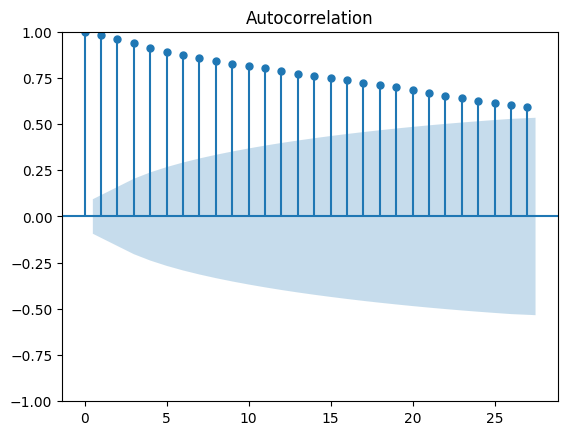

In [ ]:
acf_graph = plot_acf(df)

**Yüksek İlk Değerler:** ACF'nin ilk değeri 1'e yakın ve ilk 12 değer (yıllık mevsimselliği temsil eder) 0.7'nin üzerinde ve oldukça yüksek. Bu da veride mevsimsel bir patern olduğunu gösteriyor.

**Yavaş Azalma:** ACF değerleri gecikme arttıkça azalıyor, ancak oldukça yavaş bir şekilde azalıyor. Bu da mevsimselliğin oldukça kalıcı olduğunu ve kolayca ortadan kalkmayacağını gösteriyor.

In [ ]:
pacf(df) # PACF testi

array([ 1.        ,  0.98547327, -0.24092442,  0.02988892,  0.01015774,
        0.04730333, -0.00235708,  0.08572828,  0.01246146,  0.04263282,
       -0.00282515, -0.00795335, -0.05405697,  0.03463979,  0.052944  ,
        0.0383109 , -0.07362419, -0.0402718 ,  0.06239143, -0.02243557,
       -0.00844865, -0.11776629,  0.02980439, -0.00918497,  0.06637183,
        0.01254904, -0.00817564])

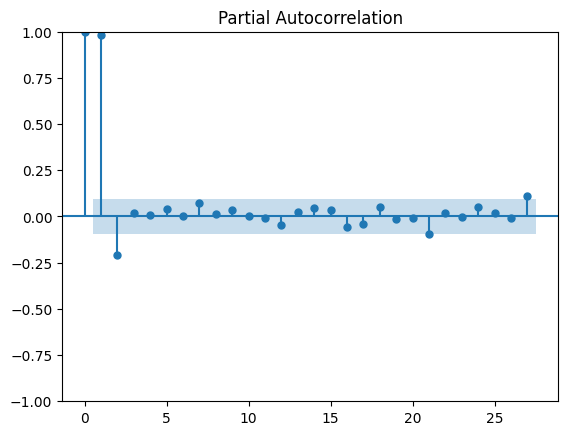

In [ ]:
pacf_graph = plot_pacf(df)

**Mevsimsel Periyotlarda Keskin Değişimler:** PACF'de 12. gecikmede ve 24. gecikmede (yıllık mevsimselliği temsil eder) keskin değişimler görülüyor. Bu da mevsimselliğin varlığını teyit ediyor.

---

**Bu sonuçlara göre zaman serisinde bir mevsimsellik durumu olduğu kanısına varabiliriz.**

**Verideki artış ve azalışlar arasındaki fark yüksek olduğu için bileşen ayrıştırmasını çarpımsal model kullanarak yaptım.**

---



**Bileşen ayrıştırmasında Toplamsal ve Çarpımsal Model seçimi:**

1. Eklemeli model, mevsimsel değişimin zaman içinde nispeten sabit olduğu durumlarda kullanışlıdır.
2. Çarpımsal model, mevsimsel değişimin zamanla arttığı durumlarda kullanışlıdır.

**Örneğin:**


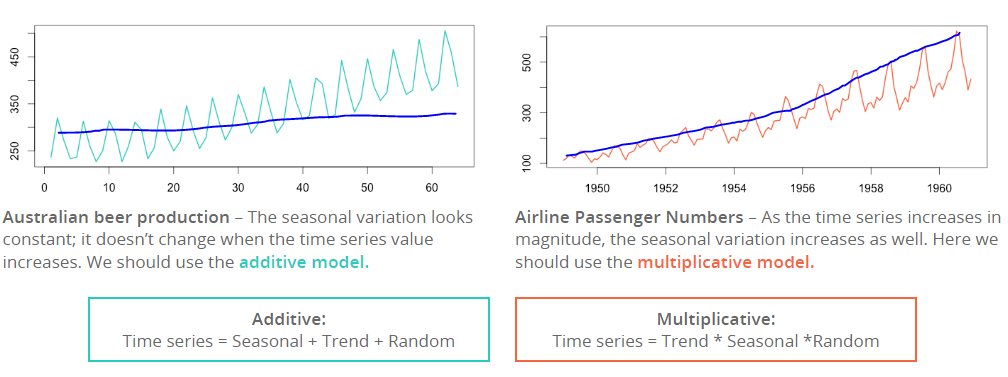

### TREND

**Mann Kendall Testi ile serinin trend içerip içermediğini test edelim.**

---
**Bir zaman serisinde trend görülürse durağanlık çok düşük bir ihtimaldir.**


In [ ]:
pymannkendall.original_test(df)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=18.09994605958111, Tau=0.5768913626056483, s=55970.0, var_s=9561819.333333334, slope=0.1663562498271236, intercept=6.531625038032807)

**trend**: This tells the trend-increasing, decreasing, or no trend.

**h**: True if the trend is present. False if no trend is present.

**p**: The p-value of the test.

**z**: The normalized test statistic.

**Tau**: Kendall Tau.

**s**: Mann-Kendal’s score

**var_s**: Variance S

**slope**: Theil-Sen estimator/slope

**intercept**: Intercept of Kendall-Theil Robust Line

---
**Mann Kendall Testine göre zaman serimizde artan bir Trend var.**


## DURAĞANLAŞTIRMA METODLARI

**Tahmin başarısını artırmak için veriyi daha durağan hale getirmemiz gerekiyor. Bazı durağanlaştırma yöntemleri:**

1. **Differencing:** Ardışık gözlemler arasındaki farklar hesaplanarak durağanlık sağlanır.

2. **Detrending:** Zaman serisindeki eğilim bileşeni kaldırılarak durağanlık elde edilir.

3. **Seasonal Differencing:** Mevsimsel dönemler arasındaki farklar hesaplanarak mevsimsellikten kurtulunur.

4. **Transformation:** Logaritmik, karekök gibi dönüşümlerle varyansı sabitleyebilir veya dağılımı durağanlaştırabilirsiniz.

5. **Moving Average Smoothing:** Ardışık dönemlerin ortalaması alınarak gürültü azaltılır ve durağanlık sağlanır.

### LOGARITMIK DONUSUM -  BAŞARISIZ

In [ ]:
df_log=pd.DataFrame(index=df.index,data=np.log(df))

In [ ]:
px.line(df_log)

In [ ]:
# ADF testi ile verinin durağan olup olmadığını inceleyelim.
adf_result = adfuller(df_log)

# extract and print the test statistic and p-value
test_statistic, p_value, _, _, _, _ = adf_result

print("ADF Test:")
print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# interpret the results
if p_value <= 0.05:
	print('Reject the null hypothesis: The time series is stationary.')
else:
	print('Fail to reject the null hypothesis: The time series is non-stationary.')

ADF Test:
Test Statistic: -1.5378249839454994
P-value: 0.5147238439118887
Fail to reject the null hypothesis: The time series is non-stationary.


In [ ]:
# (KPSS) testi ile 2. kez verinin durağan olup olmama durumunu inceleyelim.
kpss_result = kpss(df_log)

print("KPSS Test:")
print(f'Test Statistic: {kpss_result[0]}')
print(f'P-value: {kpss_result[1]}')

if kpss_result[1] > 0.05:
	print('Fail to reject the null hypothesis: The time series is stationary.')
else:
	print('Reject the null hypothesis: The time series is non-stationary.')

KPSS Test:
Test Statistic: 2.668234665273097
P-value: 0.01
Reject the null hypothesis: The time series is non-stationary.


**Logaritmik dönüşüm yöntemi ile seriyi durağan hale getiremedik. Bu sebeple Logaritmik dönüşüm yöntemini kullanmayacağız.**

### FARK ALMA - BAŞARILI

In [ ]:
df_diff = df.diff().dropna()

In [ ]:
px.line(df_diff)

In [ ]:
# ADF testi ile verinin durağan olup olmadığını inceleyelim.
adf_result = adfuller(df_diff)

# extract and print the test statistic and p-value
test_statistic, p_value, _, _, _, _ = adf_result

print("ADF Test:")
print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# interpret the results
if p_value <= 0.05:
	print('Reject the null hypothesis: The time series is stationary.')
else:
	print('Fail to reject the null hypothesis: The time series is non-stationary.')

ADF Test:
Test Statistic: -16.467657342230385
P-value: 2.2987703405916595e-29
Reject the null hypothesis: The time series is stationary.


In [ ]:
# (KPSS) testi ile 2. kez verinin durağan olup olmama durumunu inceleyelim.
kpss_result = kpss(df_diff)

print("KPSS Test:")
print(f'Test Statistic: {kpss_result[0]}')
print(f'P-value: {kpss_result[1]}')

if kpss_result[1] > 0.05:
	print('Fail to reject the null hypothesis: The time series is stationary.')
else:
	print('Reject the null hypothesis: The time series is non-stationary.')

KPSS Test:
Test Statistic: 0.028739731105155184
P-value: 0.1
Fail to reject the null hypothesis: The time series is stationary.


**Fark alma yöntemi ile seriyi durağan hale getirdik. fark alma yöntemini kullanacağız.**

In [ ]:
acf(df_diff)

array([ 1.00000000e+00,  2.34057032e-01,  2.07184667e-02, -3.99918925e-02,
       -8.10326439e-02, -6.31481195e-02, -7.80348533e-02, -5.99503860e-02,
       -3.72189310e-02, -1.57831792e-02, -1.45967243e-02,  5.51576567e-02,
       -1.80822577e-02, -5.63295288e-02, -6.14838773e-02,  2.47250492e-02,
        4.08319863e-02, -2.77591826e-02, -2.31778161e-02, -3.60466916e-02,
        8.33150195e-02,  1.09644610e-02,  3.17997685e-02, -7.02383539e-02,
       -6.27393353e-02,  7.31380852e-04, -9.38230498e-02])

In [ ]:
pacf(df_diff)

array([ 1.        ,  0.23459019, -0.03621234, -0.03902683, -0.06615074,
       -0.03141398, -0.06267105, -0.03630575, -0.02599344, -0.01362547,
       -0.02429955,  0.05535038, -0.06095906, -0.05471319, -0.04780669,
        0.05295225,  0.01499781, -0.05663462, -0.01712554, -0.03563273,
        0.10352819, -0.04189641,  0.03208577, -0.10172032, -0.01859131,
        0.02711321, -0.12412988])

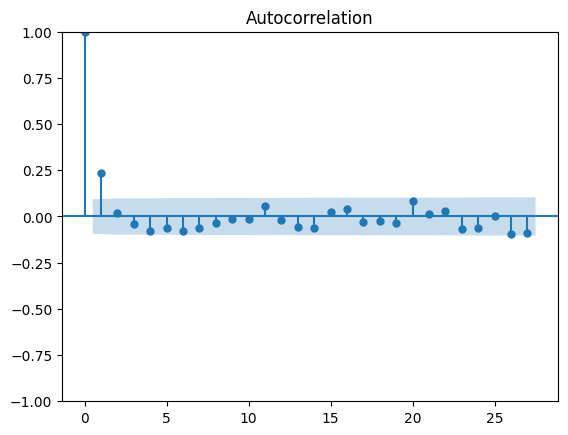

In [ ]:
acf_graph = plot_acf(df_diff)

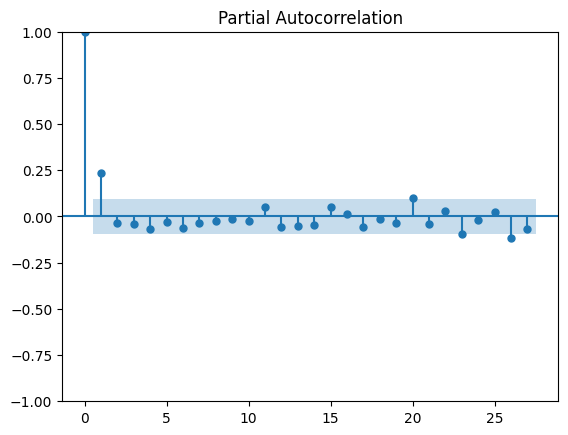

In [ ]:
pacf_graph = plot_pacf(df_diff)

In [ ]:
pymannkendall.original_test(df_diff) # mann kendall testi ile farkı alınmış serinin trend bileşenini analiz edelim.

Mann_Kendall_Test(trend='no trend', h=False, p=0.10297814698919217, z=1.6305839077607542, Tau=0.0520397597846345, s=5026.0, var_s=9496986.666666666, slope=0.002812500000000059, intercept=-0.2073437500000137)

**ACF ve PACF grafiklerinden de anlaşıldığı gibi veri durağan hale geldi fakat mannkendall testi sonucuna göre verinin trend bileşeni ortadan kalktı.**

## TIME SERIES FORECASTING

**Verisetimizi train ve test olmak üzere ikiye ayıralım.**

In [ ]:
train = df_diff[:'2020-10-01']
print("Lenght of train", len(train))

test = df_diff['2020-11-01':]
print("Lenght of test", len(test))

Lenght of train 400
Lenght of test 40


**Tahmin başarısını daha iyi anlamak için veri görselleştirme fonksiyonu hazırladım.**

In [ ]:
def plot_mape(train, test, y_pred, title):
    mape = mean_absolute_percentage_error(y_true=test, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.plot(train.index, train.values, label='TRAIN', color='blue')
    ax.plot(test.index, test.values, label='TEST', color='green')
    ax.plot(y_pred.index, y_pred.values, label='PREDICTION', color='red')
    ax.set_title(f"{title}, MAPE: {round(mape, 2)}")
    ax.set_xlabel('date')
    ax.set_ylabel('oil_price')
    ax.legend()
    plt.show()

**Yaygın bilinen Zaman serisi modelleri:**

1. **White-Noise:** Durağan serilerde kullanılabilir.

2. **SES:** Durağan serilerde kullanılabilir.

3. **DES:** Durağan ve trend içeren serilerde kullanılabilir.

4. **TES:** Durağan, trend ve mevsimsellik içeren serilerde kullanılabilir.

5. **AR:** Durağan serilerde kullanılabilir.

6. **MA:** Durağan olmayan serilerde kullanılabilir.

7. **ARMA:** Durağan serilerde kullanılabilir.

8. **ARIMA :** Durağan(durağan olmayan serileri durağanlaştırabiliriz.) ve trend içeren serilerde kullanılabilir.

9. **SARIMA :** Durağan(durağan olmayan serileri durağanlaştırabiliriz.), mevsimsellik ve trend içeren serilerde kullanılabilir.

10. **ARCH:** Finans verilerinde Volalite tahmini için kullanılır.

11. **GARCH:** Finans verilerinde Volalite tahmini için kullanılır.

12. **VAR:** Aynı anda birden fazla zaman serisi tahmini yapabilen modeldir. Durağanlık gerektirmez ve finans verilerinin tahmininde kullanılır.

---

**Serimiz durağan halde ve mevsimsellik içeriyor fakat trend içermiyor. Bu sebeple SARIMA modeli kullanabiliriz.**

**auto_arima modeli ile SARIMA modeli için 12 aylık periyorlara göre en iyi parametreleri bulalım.**

In [ ]:
model=pmd.auto_arima(train,start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True) # hyperparametre tuning

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=2475.787, Time=4.07 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2493.819, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2472.586, Time=0.98 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2472.633, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2491.844, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2470.771, Time=0.34 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2472.563, Time=1.03 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2474.241, Time=3.36 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2472.209, Time=0.99 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2472.366, Time=1.17 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2470.954, Time=1.10 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=2468.208, Time=2.22 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=2470.132, Time=4.29 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=2470.120, Time=3.56 sec
 ARIMA(2,0,1)(1,0,1

**Best model:  ARIMA(2,0,1)(0,0,0)[12] parametreleri ile SARIMA modeli hazırlayalım.**

In [ ]:
sarima=SARIMAX(train,order=(2,0,1),seasonal_order=(0,0,0,12)) # modeli hazırlayalım.

In [ ]:
pred = sarima.fit().predict(start=len(train), end=len(train) + 39) # modeli eğitelim

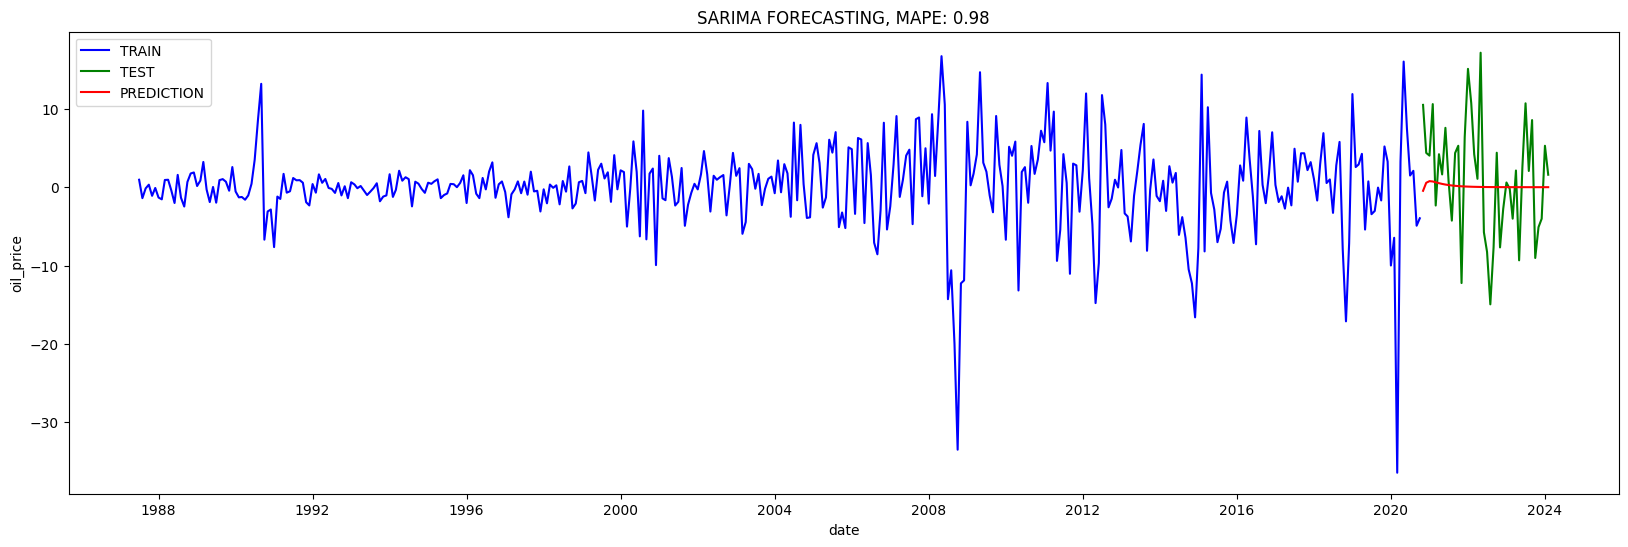

In [ ]:
plot_mape(train,test,pred,"SARIMA FORECASTING") # tahmin sonuçlarını grafik üzerinde inceleyelim.

**SARIMA Modelin başarı oranı çok düşük çıktı. Zaman serisi modelleri gerçek Dünya verilerini tahminleme konusunda genel olarak zayıf kalır. Bunun yerine zaman serisi analizini yaptıktan sonra modelleme aşamasında Yapay sinir ağları kullanmak daha mantıklıdır.**